# **CIS 419/519 Homework 3 - Spring 2022**

**Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved** 

In [ ]:
# Restart the runtime after running this cell everytime you open the notebook
!pip install pandas==1.1.5

In [ ]:
import random 
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
from sklearn.preprocessing import StandardScaler
np.random.seed(42)  # don't change this line

import dill
import base64
import math
import datetime

In [ ]:
# For autogreader only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")

[INFO, OK] Google Colab.


# **PennGrader Setup**
First, you'll need to set up the PennGrader, an autograder we are going to use throughout the semester. The PennGrader will automatically grade your answer and provide you with an instant feedback. Unless otherwise stated, you can resubmit up to a reasonable number of attempts (e.g. 100 attemptes per day). **We will only record your latest score in our backend database**. 

After finishing each homework assignment, you must submit your iPython notebook to gradescope before the homework deadline. Gradescope will then retrive and display your scores from our backend database. 

In [ ]:
%%capture
!pip3 install penngrader --upgrade

In [ ]:
from penngrader.grader import *

In [ ]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 19167508          # YOUR PENN-ID GOES HERE AS AN INTEGER#

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immediately get a score.

**NOTE:** Remember we store your submissions and check against other student's submissions... so, not that you would, but no cheating.

In [ ]:
#GRADER TODO
grader = PennGrader(homework_id = 'CIS_519_Spring22_HW3', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 19167508

Make sure this correct or we will not be able to store your grade


In [ ]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")

## Datasets
Next, we will download the dataset from Google Drive to your local runtime. After successful download, you may verify that all datasets are present in your colab instance.

- [observations.csv](https://drive.google.com/file/d/1RvNTrL147Cx90ABv4IfXcexaRyHB-U-e/view?usp=sharing)
- [test_student.csv](https://drive.google.com/file/d/1EjQ3Jy5q25GaxeNKh4ahtsLgHEyW3tUj/view?usp=sharing)


#### Acknowledgement
Dataset obtained from kaggle.com [Hourly Weather Surface - Brazil (Southeast region)](https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region/metadata )

In [ ]:
if NOTEBOOK:
  import gdown
  if not os.path.exists("observations.csv"):
    !gdown --id 1RvNTrL147Cx90ABv4IfXcexaRyHB-U-e
  if not os.path.exists("test_student.csv"):
    !gdown --id 1Z0I6iylDgTk2OKuKDaQVR9I1aJvgRsn_

#### **NOTE 1. If you are running into a `__builtins__' error, it's likely because you're using a function call of the form numpy.ndarray.mean(), like a.mean(). This does not play nice with PennGrader unfortunately. Please use the function call numpy.mean(a) instead.**

# **1. [20 pts] Data preprocessing**


This is the data preprocessing part of the homework. We will be focusing on a dataset of Brazilian weather station observations.

## **1.1. Importing the dataset**



In [ ]:
if NOTEBOOK:
    df = pd.read_csv("observations.csv")
    df = df.drop(["Unnamed: 0"], axis=1)
    print(df.head())

   wsid                 mdct  prcp    stp   smax   smin  gbrd  temp  dewp  \
0   178  2007-11-06 00:00:00   NaN  982.5  982.5  981.3   NaN  29.3  12.1   
1   178  2007-11-06 01:00:00   NaN  983.2  983.2  982.5   NaN  29.0  13.5   
2   178  2007-11-06 02:00:00   NaN  983.5  983.5  983.2   NaN  27.4  14.0   
3   178  2007-11-06 03:00:00   NaN  983.7  983.7  983.4   NaN  25.8  16.9   
4   178  2007-11-06 04:00:00   NaN  983.7  983.8  983.6   NaN  25.4  16.4   

   tmax  dmax  tmin  dmin  hmdy  hmax  hmin  wdsp   wdct  gust  
0  29.7  16.8  25.5  10.8  35.0  58.0  32.0   3.2  101.0   6.5  
1  29.9  13.6  29.0  12.2  39.0  39.0  35.0   3.6   94.0   6.4  
2  29.0  14.0  27.4  13.6  44.0  44.0  39.0   2.5   93.0   6.9  
3  27.4  16.9  25.8  14.1  58.0  58.0  44.0   1.7   96.0   5.8  
4  26.3  17.0  25.3  16.4  57.0  58.0  56.0   3.1  110.0   7.5  


In [ ]:
#Check that this outputs the data frame with 122000 rows and 19 columns
if NOTEBOOK:
    print(df.shape)

(122000, 19)


## **1.2. [20 pts] Data preprocessing**


### **1.2.1. [2 pts]** 

First let us start by converting the "mdct" column from the weather dataset into a datetime. Look into to_datetime() function in pandas.

In [ ]:
if NOTEBOOK:
    # STUDENT TODO: Convert the data type of the `mcdt` column in df to datetime
    df['mdct'] = pd.to_datetime(df['mdct'] )

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_datetime', answer = df.describe())

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
df

,wsid,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121995,423,2011-05-09 11:00:00,NaN,929.1,929.1,928.6,229.705,16.2,14.6,16.2,14.9,14.3,13.4,90.0,94.0,90.0,0.7,244.0,2.4
121996,423,2011-05-09 12:00:00,NaN,929.7,929.9,929.1,565.674,18.0,15.8,18.0,15.8,15.8,14.4,87.0,93.0,87.0,0.9,198.0,2.8
121997,423,2011-05-09 13:00:00,NaN,929.6,929.7,929.5,1578.380,20.6,16.0,21.2,16.9,18.0,15.3,75.0,87.0,72.0,2.2,149.0,5.7
121998,423,2011-05-09 14:00:00,NaN,929.4,929.8,929.4,1113.874,21.2,16.5,21.2,16.7,20.1,15.9,75.0,79.0,74.0,2.9,181.0,7.1


### **1.2.2. [4 pts]** 

1.   Replace the missing values in the columns `gust, gbrd, wdsp, dewp, dmin, dmax` with 0.

2. Drop the rows where temp is 0.

3. Drop the column `prcp`.

In [ ]:
if NOTEBOOK:
    # STUDENT TODO:
    df[['gust', 'gbrd', 'wdsp', 'dewp', 'dmin', 'dmax']] = df[['gust', 'gbrd', 'wdsp', 'dewp', 'dmin', 'dmax']].fillna(0)
    df_2 = df[df['temp']!=0]
    df = df_2
    df = df.drop(['prcp'], axis=1)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_remove', answer = df.describe())

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.2.3. [10 pts]** 

We want to calculate the difference in each metric over 1 hour. So basically if the temperature goes from 19.4 at 1200 hrs to 19.1 at 1300 hrs on a certain date we want the value to be -0.3.

Create two copies of the dataframe and shift the datetime by +1 hour on the right copy.

In [ ]:
if NOTEBOOK:
    import datetime
    # STUDENT TODO:
    left_df = df.copy()
    right_df = df.copy()
    to_add = datetime.timedelta(hours = 1)
    right_df['mdct'] = right_df['mdct']+to_add
   

In [ ]:
left_df

,wsid,mdct,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,2007-11-06 00:00:00,982.5,982.5,981.3,0.000,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,2007-11-06 01:00:00,983.2,983.2,982.5,0.000,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,2007-11-06 02:00:00,983.5,983.5,983.2,0.000,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,2007-11-06 03:00:00,983.7,983.7,983.4,0.000,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,2007-11-06 04:00:00,983.7,983.8,983.6,0.000,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121995,423,2011-05-09 11:00:00,929.1,929.1,928.6,229.705,16.2,14.6,16.2,14.9,14.3,13.4,90.0,94.0,90.0,0.7,244.0,2.4
121996,423,2011-05-09 12:00:00,929.7,929.9,929.1,565.674,18.0,15.8,18.0,15.8,15.8,14.4,87.0,93.0,87.0,0.9,198.0,2.8
121997,423,2011-05-09 13:00:00,929.6,929.7,929.5,1578.380,20.6,16.0,21.2,16.9,18.0,15.3,75.0,87.0,72.0,2.2,149.0,5.7
121998,423,2011-05-09 14:00:00,929.4,929.8,929.4,1113.874,21.2,16.5,21.2,16.7,20.1,15.9,75.0,79.0,74.0,2.9,181.0,7.1


In [ ]:
right_df

,wsid,mdct,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,2007-11-06 01:00:00,982.5,982.5,981.3,0.000,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,2007-11-06 02:00:00,983.2,983.2,982.5,0.000,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,2007-11-06 03:00:00,983.5,983.5,983.2,0.000,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,2007-11-06 04:00:00,983.7,983.7,983.4,0.000,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,2007-11-06 05:00:00,983.7,983.8,983.6,0.000,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121995,423,2011-05-09 12:00:00,929.1,929.1,928.6,229.705,16.2,14.6,16.2,14.9,14.3,13.4,90.0,94.0,90.0,0.7,244.0,2.4
121996,423,2011-05-09 13:00:00,929.7,929.9,929.1,565.674,18.0,15.8,18.0,15.8,15.8,14.4,87.0,93.0,87.0,0.9,198.0,2.8
121997,423,2011-05-09 14:00:00,929.6,929.7,929.5,1578.380,20.6,16.0,21.2,16.9,18.0,15.3,75.0,87.0,72.0,2.2,149.0,5.7
121998,423,2011-05-09 15:00:00,929.4,929.8,929.4,1113.874,21.2,16.5,21.2,16.7,20.1,15.9,75.0,79.0,74.0,2.9,181.0,7.1


1. Perform a left join between `left_df` and `right_df` on the `wsid` and `mcdt` columns. In the `merged_df` retain only the rows which have values from both `left_df` and `right_df`. (Clue: set `indicator` to be `True` while performing the merge and filter using the `_merge` column in the `merged_df`)

Understand how `merged_df` looks like using `.head(), .describe(), .info(), etc.` before proceeding further.

2. For the variables `stp, smax, smin, gbrd, dewp, tmax, dmax, tmin, dmin, hmdy, hmax, hmin, wdsp, wdct, gust, temp` (stored in the `columns` list), subtract the "_y" columns from their corresponding "_x" columns. For example, you should be subtracting `stp_y` column from the `stp_x` column in merged_df. 

3. Store each of these subtraction results in a new column in `merged_df`. For example, store the result of `merged_df["stp_x"] - merged_df["stp_y"]` in `merged_df["stp"]`.

```
merged_df["stp"] = merged_df["stp_x"] - merged_df["stp_y"]
```

> Do this for all the variables in `columns`.

4. Drop the columns with "_x" and "_y" in their name from `merged_df`.

5. Drop the columns `['_merge', 'mdct', 'wsid']` from `merged_df`.

In [ ]:
if NOTEBOOK:
    columns = ["stp", "smax", "smin", "gbrd", "dewp", "tmax", 
               "dmax", "tmin", "dmin", "hmdy", "hmax",
               "hmin", "wdsp", "wdct", "gust", "temp"]
            
    # STUDENT TODO:
    merged_df = left_df.merge(right_df, on = ['wsid','mdct'], how = 'left', indicator = True)
    merged_df=merged_df.drop(np.where(merged_df['_merge']=='left_only')[0])
    merged_df['stp'] = merged_df['stp_x'] - merged_df['stp_y']
    merged_df['smax'] = merged_df['smax_x'] - merged_df['smax_y']
    merged_df['smin'] = merged_df['smin_x'] - merged_df['smin_y']
    merged_df['gbrd'] = merged_df['gbrd_x'] - merged_df['gbrd_y']
    merged_df['dewp'] = merged_df['dewp_x'] - merged_df['dewp_y']
    merged_df['tmax'] = merged_df['tmax_x'] - merged_df['tmax_y']
    merged_df['dmax'] = merged_df['dmax_x'] - merged_df['dmax_y']
    merged_df['tmin'] = merged_df['tmin_x'] - merged_df['tmin_y']
    merged_df['dmin'] = merged_df['dmin_x'] - merged_df['dmin_y']
    merged_df['hmdy'] = merged_df['hmdy_x'] - merged_df['hmdy_y']
    merged_df['hmax'] = merged_df['hmax_x'] - merged_df['hmax_y']
    merged_df['hmin'] = merged_df['hmin_x'] - merged_df['hmin_y']
    merged_df['wdsp'] = merged_df['wdsp_x'] - merged_df['wdsp_y']
    merged_df['wdct'] = merged_df['wdct_x'] - merged_df['wdct_y']
    merged_df['gust'] = merged_df['gust_x'] - merged_df['gust_y']
    merged_df['temp'] = merged_df['temp_x'] - merged_df['temp_y']

In [ ]:
merged_df = merged_df[['stp', 'smax', 'smin', 'gbrd', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp', 'wdct', 'gust', 'temp']]
merged_df

,stp,smax,smin,gbrd,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,temp
1,0.7,0.7,1.2,0.000,1.4,0.2,-3.2,3.5,1.4,4.0,-19.0,3.0,0.4,-7.0,-0.1,-0.3
2,0.3,0.3,0.7,0.000,0.5,-0.9,0.4,-1.6,1.4,5.0,5.0,4.0,-1.1,-1.0,0.5,-1.6
3,0.2,0.2,0.2,0.000,2.9,-1.6,2.9,-1.6,0.5,14.0,14.0,5.0,-0.8,3.0,-1.1,-1.6
4,0.0,0.1,0.2,0.000,-0.5,-1.1,0.1,-0.5,2.3,-1.0,0.0,12.0,1.4,14.0,1.7,-0.4
5,0.0,0.0,0.0,0.000,-0.2,-0.9,-0.6,-1.5,-0.4,5.0,4.0,1.0,-1.1,-11.0,-0.7,-1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105195,0.5,0.5,0.9,216.395,1.1,1.9,1.3,0.9,0.5,-4.0,-3.0,-4.0,-0.7,16.0,0.0,1.9
105196,0.6,0.8,0.5,335.969,1.2,1.8,0.9,1.5,1.0,-3.0,-1.0,-3.0,0.2,-46.0,0.4,1.8
105197,-0.1,-0.2,0.4,1012.706,0.2,3.2,1.1,2.2,0.9,-12.0,-6.0,-15.0,1.3,-49.0,2.9,2.6
105198,-0.2,0.1,-0.1,-464.506,0.5,0.0,-0.2,2.1,0.6,0.0,-8.0,2.0,0.7,32.0,1.4,0.6


In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_shift', answer = merged_df.describe())

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.2.4. [4 pts]** 

We have created a copy of `merged_df` for you (`final_cleaned_df`).

1. Replace any negative `temp` value (`temp` < 0) in `final_cleaned_df` with 0.
2. Replace any non-negative `temp` value (`temp` >= 0) in `final_cleaned_df` with 1.

In [ ]:
if NOTEBOOK:
    final_cleaned_df = merged_df.copy()
    # STUDENT TODO:
    final_cleaned_df['temp']=(final_cleaned_df['temp']>=0)*1
    print(final_cleaned_df['temp'])

1         0
2         0
3         0
4         0
5         0
         ..
105195    1
105196    1
105197    1
105198    1
105199    1
Name: temp, Length: 104366, dtype: int64


In [ ]:
final_cleaned_df

,stp,smax,smin,gbrd,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,temp
1,0.7,0.7,1.2,0.000,1.4,0.2,-3.2,3.5,1.4,4.0,-19.0,3.0,0.4,-7.0,-0.1,0
2,0.3,0.3,0.7,0.000,0.5,-0.9,0.4,-1.6,1.4,5.0,5.0,4.0,-1.1,-1.0,0.5,0
3,0.2,0.2,0.2,0.000,2.9,-1.6,2.9,-1.6,0.5,14.0,14.0,5.0,-0.8,3.0,-1.1,0
4,0.0,0.1,0.2,0.000,-0.5,-1.1,0.1,-0.5,2.3,-1.0,0.0,12.0,1.4,14.0,1.7,0
5,0.0,0.0,0.0,0.000,-0.2,-0.9,-0.6,-1.5,-0.4,5.0,4.0,1.0,-1.1,-11.0,-0.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105195,0.5,0.5,0.9,216.395,1.1,1.9,1.3,0.9,0.5,-4.0,-3.0,-4.0,-0.7,16.0,0.0,1
105196,0.6,0.8,0.5,335.969,1.2,1.8,0.9,1.5,1.0,-3.0,-1.0,-3.0,0.2,-46.0,0.4,1
105197,-0.1,-0.2,0.4,1012.706,0.2,3.2,1.1,2.2,0.9,-12.0,-6.0,-15.0,1.3,-49.0,2.9,1
105198,-0.2,0.1,-0.1,-464.506,0.5,0.0,-0.2,2.1,0.6,0.0,-8.0,2.0,0.7,32.0,1.4,1


In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_temp', answer = final_cleaned_df.describe())

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **2. [25 pts] AdaBoost**

## **2.1.  [3 pts] Logistic regression with sample weights**

As you will have learnt from the lectures, AdaBoost fits weak learners (here, logistic regression model)  in each iteration, to a dataset with weights $w_i$ attached to each sample $(x_i, y_i)$. The loss function now becomes:

> $
\mathcal{L}({\theta}) = -\sum_{i =1}^N w_{i} \times [ y_i\log(h_{{\theta}}({x}_i)) + (1 - y_i)\log(1 - h_{{\theta}}({x}_i))]
$

where $h_\theta(x)$ is the logistic regression hypothesis function.

The gradient of this weighted loss function with respect to the weight $\theta_j$ is given by:

> $\frac{\partial \mathcal{L}({\theta})}{\partial \theta_j} = \sum_{i=1}^{N}w_{i}(h_{{\theta}}({x}_i) - y_i)x_{ij}$

Using this information, complete the `compute_gradient` method in the `LogisticRegression` class to account for sample weights.

In [ ]:
import numpy as np
from numpy.linalg import norm

In [ ]:
class LogisticRegression:
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.1
        Learning rate
    tol : float, default=0.01
        Tolerance for stopping criteria
    max_iter : int, default=1000
        Maximum number of iterations of gradient descent

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    converged_: boolean
        Boolean value indicating whether gradient descent converged or not
    """

    def __init__(self, alpha=0.1, tol=0.01, max_iter=1000):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter

        self.theta_ = None
        self.converged_ = False

    def compute_gradient(self, theta, X, y, sample_weight):
        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array
        sample_weight: numpy.ndarray of shape (N,)
            The sample weight array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        y_hat = sigmoid(X.dot(theta))

        # STUDENT TODO: Compute the gradient
        N,D = X.shape
        gradient =  np.dot(sample_weight*(y_hat-y),X)
        return gradient
        # STUDENT TODO END

    def fit(self, X, y, sample_weight):
        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array
        sample_weight: numpy.ndarray of shape (N,)
            The sample weight array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        theta_old = np.zeros((D + 1,))
        theta_new = theta_old.copy()

        for i in range(self.max_iter):
            theta_new = theta_old - self.alpha * self.compute_gradient(theta_old, X, y, sample_weight)

            if norm(theta_new - theta_old) / (norm(theta_old) + self.tol) <= self.tol:
                self.converged_ = True
                break
            
            theta_old = theta_new.copy()

        self.theta_ = theta_new

    def predict_proba(self, X):
        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        
        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        y_hat = sigmoid(X.dot(self.theta_))
        return y_hat

    def predict(self, X):
        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """

        y_hat = self.predict_proba(X)
        y_pred = y_hat.copy()
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

### Test case for the `compute_gradient` method

In [ ]:
def test_compute_gradient(StudentLogisticRegression):
    
    student_lr_clf = StudentLogisticRegression()
    np.random.seed(0)
    theta_tc = np.random.randn(2)
    X_tc = np.random.randn(100, 2)
    y_tc = np.random.randint(0, 2, 100)
    sample_weight_tc = np.random.uniform(0, 1, 100)
    student_ans = student_lr_clf.compute_gradient(theta_tc, X_tc, y_tc, sample_weight_tc)
    required_ans = np.array([12.903225675830651, -1.0829605960182223])
    
    assert np.linalg.norm(student_ans - required_ans) < 1e-2 * required_ans.size

if NOTEBOOK:
    test_compute_gradient(LogisticRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_compute_gradient_autograder', answer = LogisticRegression)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **2.2. [20 pts] AdaBoostClassifier Implementation**

In this section, you will be implementing the AdaBoost classifier with the logistic regression weak learner from above.

### **2.2.1. [12 pts] Follow the hints in the `fit` method in the `AdaBoostClassifier` class to implement the following algorithm.**

Use the following Adaboost pseudocode as a reference.

**INPUT:**

1. training data $X, y = \{(x_{i}, y_{i})\}_{i=1}^N$

2. number of iterations $T$

**ALGORITHM:**

1.   Initialize $N$ uniform weights, i.e., $w_{1} = [1/N, 1/N, ..., 1/N]$

2.   `For` $t = 1, 2, ... T$:

> 2.1. Train model $h_t$ on $X$ and $y$ with instance weights $w_{t}$

> 2.2. Compute the weighted training error rate of $h_{t}$: $\epsilon_{t} = \sum_{i: y_i \ne h_t(x_i)} w_{t,i}$

> 2.3. If $\epsilon_{t} > 0.5$, flip $h_t$'s predictions

> 2.4. Set $\beta_{t} = \frac{1}{2}\text{ln}\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$

> 2.5. Update all instance weights: $w_{t + 1,i} = w_{t,i}\times\text{exp}(-\beta_{t}y_{i}h_{t}(x_{i}))$ $\forall i = 1, 2, ..., N$

> 2.6. Normalize $w_{t+1}$ such that the elements sum to 1

> `End For`

### **2.2.2. [8 pts] Follow the hints in the `predict` method in the `AdaBoostClassifier` class for obtaining the predictions of the trained AdaBoost classifier.**

> $H(x) = \text{sign}\left(\sum_{t=1}^{T}\beta_{t}h_{t}(x)\right)$

In [ ]:
class AdaBoostClassifier:
    """
    AdaBoost classifier based on logistic regression

    Parameters
    ----------
    T: int, default=100
        The number of logistic regression models in the boosting model

    Attributes
    ----------
    beta_arr_ : list of length T
        The list of beta values in the boosting model

    h_arr_: list of length T
        The list of logistic regression models in the boosting model
    """

    def __init__(self, T=100):

        self.T = T

        self.beta_arr_ = []
        self.h_arr_ = []

    def fit(self, X, y):
        """
        Train the logistic regression models (h) and compute their coefficients (beta), 
        and store them in h_arr_ and beta_arr_ respectively.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N = X.shape[0]

        # STUDENT TODO: Initialize w with appropriate values
        w = np.full(y.shape, fill_value = (1/N))
        # STUDENT TODO END

        y_ = y.copy()
        # STUDENT TODO: Update y_ such that the 0's in y_ are replaced by -1
        mask = (y_ == 0)
        y_[mask] = -1
        # STUDENT TODO END

        for t in range(self.T):
            h = LogisticRegression()

            # STUDENT TODO: Fit h to X and y using w as the sample weights
            h.fit(X,y,w)
            # STUDENT TODO END

            # STUDENT TODO: Obtain the predictions from h and compute epsilon
            y_pred = h.predict(X)
            epsilon = 0
            for i in range(0,len(y_pred)):
              if (y_pred[i]!=y[i]):
                  epsilon+=w[i]
            # STUDENT TODO END

            # STUDENT TODO: If epsilon > 0.5:
            # 1. flip the predictions, i.e., replace 1's with 0's and 0's with 1's
            # 2. invert the model (h), i.e., make it predict 1 for what it predicted 0 earlier and vice-versa (clue: think about modifying h.theta_)        
            
            if epsilon >0.5:
              y_pred = 1-y_pred
              h.theta_ *= -1
            # STUDENT TODO END

            self.h_arr_.append(h)

            if epsilon == 0:
                beta = np.inf
                self.beta_arr_.append(beta)
                break
            
            # STUDENT TODO: Compute beta
            beta = 0.5*np.log((1/epsilon)-1)
            # print(beta)

            # STUDENT TODO END

            self.beta_arr_.append(beta)
            
            y_pred_ = y_pred.copy()

            # STUDENT TODO: Update y_pred_ such that the 0's in y_pred_ are replaced by -1
            mask = [y_pred_ == 0]
            y_pred_[mask] = -1
            # STUDENT TODO END

            # STUDENT TODO: Update w and normalize it such that the values in w sum to 1
            w = w*np.exp(y_pred_ *y_ *beta *-1)
            w = w/(np.sum(w))
            # print(w)
            # STUDENT TODO END

    def predict(self, X):
        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """
        
        N = X.shape[0]
        
        # Initialize the summation of beta times h for each x_i 
        sum_beta_times_h = np.zeros((N,))

        for t in range(len(self.h_arr_)):
            
            # STUDENT TODO: Obtain the predictions of the t-th model in self.h_arr_
            # Replace the 0's in the array with -1
            p = self.h_arr_[t]
            pred = p.predict(X)
            mask = [pred ==0]
            pred[mask] = -1
            # STUDENT TODO END

            # STUDENT TODO: Update sum_beta_times_h
            sum_beta_times_h += pred * (self.beta_arr_[t])
            # STUDENT TODO END

        # STUDENT TODO: Create an array `y_pred` for the final predictions
        # Fill 0's and 1's in `y_pred` depending on the sum_beta_time_h value in the corresponding location 
        y_pred = sum_beta_times_h
        mask_1 = [y_pred > 0]
        mask_2 = [y_pred <=0]
        y_pred[mask_1] = 1
        y_pred[mask_2] = 0
        return y_pred
        # STUDENT TODO END


### Test case for the `fit` method

In [ ]:
def test_adaboost_fit(StudentAdaBoostClassifier):

    T = 4
    N = 100
    D = 2

    student_ab_clf = StudentAdaBoostClassifier(T=T)
    np.random.seed(0)
    X_tc = np.random.randn(N, D)
    y_tc = np.random.randint(0, 2, N)
    student_ab_clf.fit(X_tc, y_tc)

    beta_arr_student_ans = student_ab_clf.beta_arr_
    beta_arr_required_ans = np.array([0.08017132503758954, 0.046732864002838985, 
                                      0.022808008179707476, 0.07012335626140642])
    assert np.linalg.norm(beta_arr_student_ans - beta_arr_required_ans) < 1e-2 * beta_arr_required_ans.size

    h_arr_student_ans = np.zeros([T, D + 1])

    for indx, h in enumerate(student_ab_clf.h_arr_):
        h_arr_student_ans[indx] = h.theta_

    h_arr_required_ans = np.array([[-0.01514967, -0.01713051,  0.21344566],
                                   [-0.01738886, -0.00656722,  0.12035635],
                                   [-0.0132557,  -0.00428943, 0.06616284],
                                   [-0.01037174, -0.00334141,  0.03943088]])

    assert np.linalg.norm(h_arr_student_ans - h_arr_required_ans) < 1e-2 * h_arr_required_ans.size

if NOTEBOOK:
    test_adaboost_fit(AdaBoostClassifier)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_adaboost_fit_autograder', answer = AdaBoostClassifier)

Correct! You earned 12/12 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### Test case for the `predict` method

In [ ]:
def test_adaboost_predict(StudentAdaBoostClassifier):

    T = 4
    N = 100
    D = 2

    student_ab_clf = StudentAdaBoostClassifier(T=T)
    np.random.seed(0)
    X_tc = np.random.randn(N, D)
    y_tc = np.random.randint(0, 2, N)
    student_ab_clf.fit(X_tc, y_tc)

    student_ans = student_ab_clf.predict(X_tc)
    required_ans = [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 
                    0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
                    1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 
                    0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 
                    1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]

    assert np.mean(student_ans == required_ans) >= 0.98

if NOTEBOOK:
    test_adaboost_predict(AdaBoostClassifier)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:146: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a diffe

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_adaboost_predict_autograder', answer = AdaBoostClassifier)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **2.3. [2 pts] AdaBoost on the dataset**

Follow the hints in the `adaboost_on_dataset` method in the below cell to run `AdaBoostClassifier` on the dataset you prepared in section 1.

In [ ]:
if NOTEBOOK:
    test_df = pd.read_csv("test_student.csv").drop(columns=["Unnamed: 0"])

def adaboost_on_dataset():
    """
    Trains the AdaBoostClassifier on a real-world dataset.

    Parameters
    ----------
    Nothing

    Returns
    -------
    y_test_pred: numpy.ndarray
        The predicted classes of the datapoints in test_df
    """

    # STUDENT TODO START: Initialize X_train and y_train with appropriate values (clue: use .iloc followed by .values of the DataFrame class)
    x_train = final_cleaned_df.iloc[:, :-1].values
    y_train = final_cleaned_df.iloc[:, -1:].values.flatten()
    # X_train.head(2)
    # y_train.head(2)
    # STUDENT TODO END

    # STUDENT TODO START: Initialize X_test
    x_test = test_df.values
    # STUDENT TODO END
    
    scaler = StandardScaler()
    # STUDENT TODO START: Scale the features of X_train and X_test using scaler
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    # STUDENT TODO END

    clf = AdaBoostClassifier(T=10)
    # STUDENT TODO START: Now fit clf to the entire training data, i.e., X_train and y_train after feature scaling
    clf.fit(x_train, y_train)
    # STUDENT TODO END

    # STUDENT TODO START: Predict the classes of the datapoints in X_test and return the result
    pred = clf.predict(x_test)
    return pred
    # STUDENT TODO END

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    y_test_pred = adaboost_on_dataset()
    grader.grade(test_case_id = 'test_adaboost_on_dataset_autograder', answer = y_test_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:146: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a diffe

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **3. [8 pts, 419-optional] XGBoost**

## TODOs for this section:
- You'll use xgboost library to build a classifier for the above problem. XGBoost is a popular library for gradient boosting, and you can find its documentation [here](https://xgboost.readthedocs.io/en/latest/). 
- You need to get at least 0.75 accuracy on the test set to receive full credits from the autograder.

In [ ]:
if NOTEBOOK:
  train_df = final_cleaned_df.copy()
  test_df = pd.read_csv("test_student.csv").drop(columns=["Unnamed: 0"])

In [ ]:
if NOTEBOOK:
    import xgboost as xgb
    
    # STUDENT TODO STARTS: 
    # 1. Fit an xgboost classifier to the training data (train_df, target variable is temp) 
    # 2. Obtain the predictions of the trained model on test_df in the variable y_test_pred
    # 3. Tune the hyperparameters such that you pass the autograder threshold accuracy of 0.75
    x_train = final_cleaned_df.iloc[:, :-1].values
    y_train = final_cleaned_df.iloc[:, -1:].values.flatten()
    xgb_model = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.01, subsample = 0.6, min_child_weight = 10, max_depth = 4, gamma = 1, col_sample_bytree = 0.6)
    xgb_model.fit(x_train, y_train)
    x_test = test_df.values
    y_test_pred = xgb_model.predict(x_test)
    # STUDENT TODO ENDS

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_xgboost', answer = y_test_pred)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def point_on_line(a, b, p):
    ap = p - a
    ab = b - a
    t = np.dot(ap, ab) / np.dot(ab, ab)
    # if you need the the closest point belonging to the segment
    t = max(0, min(1, t))
    result = a + t * ab
    return result

[6.3 2.1]


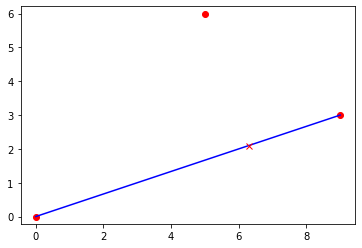

In [ ]:
A = np.array([ 0, 0 ])
B = np.array([ 9, 3 ])
P = np.array([ 5, 6])

projected = point_on_line(A, B, P) 
print(projected)

plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.axis('equal')

x_values = [A[0], B[0]]
y_values = [A[1], B[1]]

plt.plot(B[0], B[1], 'ro')
plt.plot(A[0], A[1], 'ro')
plt.plot(P[0], P[1], 'ro')
plt.plot(x_values, y_values, 'b-')
plt.plot(projected[0], projected[1], 'rx')

In [ ]:
print(projected)

[6.3 2.1]


## Submit to Gradescope
Congratulations! You've finished the homework. Don't forget to submit your final notebook on [Gradescope](gradescope.com).